# Hypothesis: the situation of natural disasters frequency, mortality and caused damages have been changing worlwide over the past 50 years. Explaining the factors
the situation with natural disasters have changed worlwide during the past 50 years


### I. Frequency of natural disasters
Dynamic of natural disasters occurence: 
  - Worlwide
  - By continent
  - By type
  - By start month

### II. Number of deaths and affected people
Total deaths and affected people:
  - Worlwide situation and dynamic
  - By type

Average number of deaths and affected people per disaster:
  - Worlwide situation and dynamic
  - By continent
  - By type
  
### III. Damages caused by natural disasters


  - Total damages
  - Average damages per disaster
  - What does it depend on?


### Data preparation

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

df = pd.read_csv('1970-2021_DISASTERS.csv')

In [27]:
df.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,Total Affected,Deaths and Affected,Reconstruction Costs (k US$),Insured Damages (k US$),Total Damages (k US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,36.0,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,13.0,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,3648000.0,3948000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,110.0,127.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [28]:
df = df.drop(['Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Subsubtype', 'Event Name', 'Location', 'Appeal', 'Declaration', 'Aid Contribution', 'Origin', 'Associated Dis', 'Associated Dis2', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'], axis=1)

In [29]:
df.describe().round(2)

,Year,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Deaths and Affected,Reconstruction Costs (k US$),Insured Damages (k US$),Total Damages (k US$),CPI
count,14644.00,4569.00,14644.00,14376.00,11577.00,14644.00,14095.00,11650.00,10199.00,3651.00,8.846000e+03,2249.00,1.104100e+04,1.329800e+04,31.00,1094.00,4.863000e+03,14329.00
mean,2001.60,50935.31,2001.61,6.41,15.21,2001.66,6.55,15.79,361.81,2486.69,8.889099e+05,72295.59,7.277392e+05,6.045013e+05,2392251.39,799942.38,7.746867e+05,68.76
std,12.54,321100.72,12.54,3.39,8.96,12.54,3.35,8.87,6495.05,34024.04,8.680288e+06,527142.17,7.851210e+06,7.159331e+06,5229396.72,3060282.73,4.901266e+06,21.43
min,1970.00,-57.00,1970.00,1.00,1.00,1970.00,1.00,1.00,1.00,1.00,1.000000e+00,3.00,1.000000e+00,1.000000e+00,84.00,34.00,2.000000e+00,15.00
25%,1993.00,7.00,1993.00,4.00,7.00,1993.00,4.00,8.00,5.00,12.00,1.200000e+03,514.00,6.320000e+02,1.670000e+02,12000.00,50000.00,1.000000e+04,55.82
50%,2003.00,180.00,2003.00,7.00,15.00,2003.00,7.00,16.00,16.00,50.00,1.000000e+04,3000.00,5.736000e+03,2.510000e+03,194000.00,172500.00,7.100000e+04,69.50
75%,2012.00,15150.00,2012.00,9.00,23.00,2012.00,9.00,24.00,50.00,200.00,8.855250e+04,16000.00,5.600000e+04,3.226000e+04,1520375.50,500000.00,3.500000e+05,86.91
max,2021.00,13025874.00,2021.00,12.00,31.00,2021.00,12.00,31.00,300000.00,1800000.00,3.300000e+08,15850000.00,3.300000e+08,3.300000e+08,25000000.00,60000000.00,2.100000e+08,100.00


In [30]:
len(df)

14644

In [31]:
df['Dis No'].value_counts() # check if Dis No values are unique

1970-0013-ARG    1
2008-0506-SOM    1
2008-0257-SUR    1
2008-9755-SYR    1
2008-0384-TCA    1
                ..
1996-0468-SDN    1
1996-0126-SDN    1
1996-9220-SDN    1
1996-0130-SLE    1
2021-0481-SSD    1
Name: Dis No, Length: 14644, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Dis No                        14644 non-null  object 
 1   Year                          14644 non-null  int64  
 2   Disaster Type                 14644 non-null  object 
 3   Disaster Subtype              11897 non-null  object 
 4   Country                       14644 non-null  object 
 5   ISO                           14644 non-null  object 
 6   Region                        14644 non-null  object 
 7   Continent                     14644 non-null  object 
 8   OFDA Response                 1450 non-null   object 
 9   Dis Mag Value                 4569 non-null   float64
 10  Dis Mag Scale                 13571 non-null  object 
 11  Latitude                      2331 non-null   object 
 12  Longitude                     2335 non-null   object 
 13  L

In [33]:
df.columns

Index(['Dis No', 'Year', 'Disaster Type', 'Disaster Subtype', 'Country', 'ISO',
       'Region', 'Continent', 'OFDA Response', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Deaths and Affected', 'Reconstruction Costs (k US$)',
       'Insured Damages (k US$)', 'Total Damages (k US$)', 'CPI'],
      dtype='object')

In [34]:
# Remove year 2020 and 2021 to have equal decades (year 2021 not full)
df = df[df.Year < 2020]

In [35]:
def decade(year):
    if year >= 2010:
        return '2010s'
    if year >= 2000:
        return '2000s'
    elif year >= 1990:
        return '1990s'
    elif year >= 1980:
        return '1980s'
    else:
        return '1970s'

df['Decade'] = df['Year'].map(decade)

In [36]:
# Damages adjusted by CPI
df['Damages adjusted'] = df['Total Damages (k US$)'] / (df['CPI'] / 100)

# I. Frequency of natural disasters

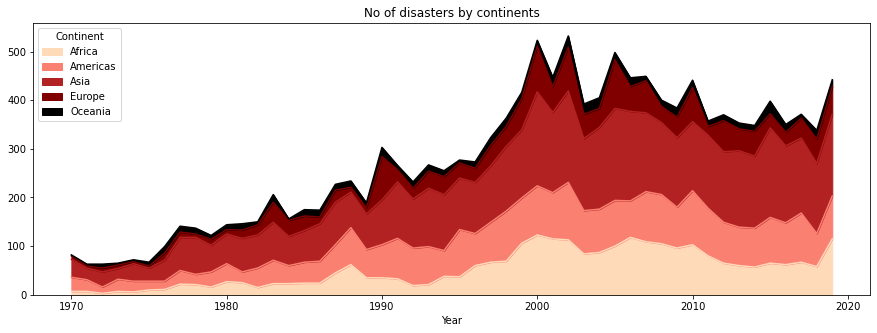

In [37]:
fig, ax = plt.subplots(1, figsize=(15, 5))

df_plot = df.groupby(['Continent','Year']).size().reset_index().pivot(columns='Continent', index='Year', values=0)
df_plot.plot.area(color=['peachpuff', 'salmon', 'firebrick','maroon', 'black'], ax=ax)

ax.set_title("No of disasters by continents");

In [38]:
import urllib.request, json 
with urllib.request.urlopen("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json") as url:
    data = json.loads(url.read().decode())

df_map1 = df.groupby('ISO')[['Dis No']].count().reset_index()

world_map1 = folium.Map(location=[0,0], zoom_start=2)

folium.Choropleth(geo_data=data,
                data=df_map1,
                columns=['ISO', 'Dis No'],
                key_on='feature.id',
                fill_color='OrRd',
                legend_name='Number of disasters 1970-2019'
                ).add_to(world_map1)

world_map1

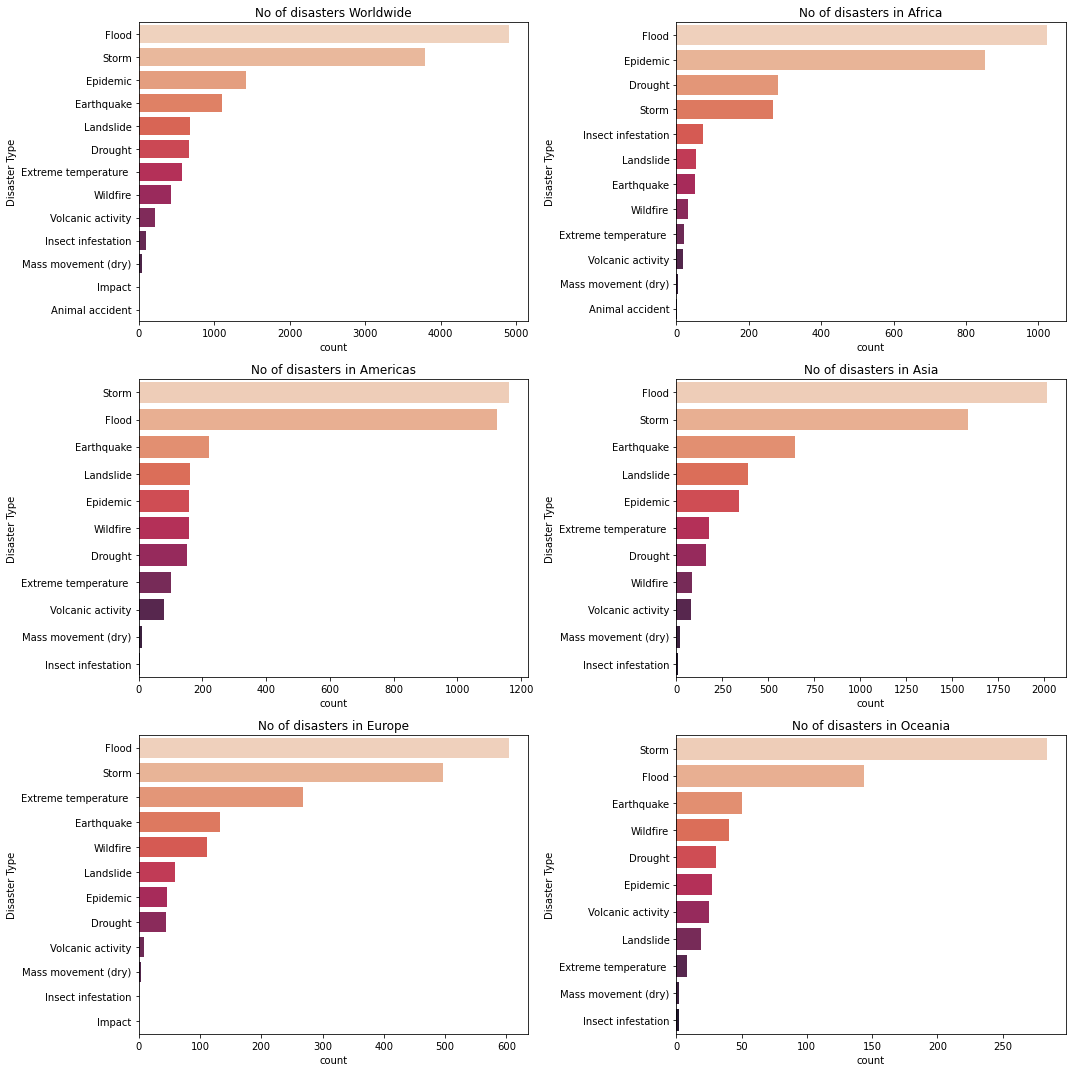

In [39]:
df_africa = df[df['Continent'] == 'Africa']
df_america = df[df['Continent'] == 'Americas']
df_asia = df[df['Continent'] == 'Asia']
df_europe = df[df['Continent'] == 'Europe']
df_oceania = df[df['Continent'] == 'Oceania']

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.countplot(y='Disaster Type', data=df, order=df['Disaster Type'].value_counts().index, palette='rocket_r', ax=axs[0, 0])
sns.countplot(y='Disaster Type', data=df_africa, order=df_africa['Disaster Type'].value_counts().index, palette='rocket_r', ax=axs[0, 1])
sns.countplot(y='Disaster Type', data=df_america, order=df_america['Disaster Type'].value_counts().index, palette='rocket_r', ax=axs[1, 0])
sns.countplot(y='Disaster Type', data=df_asia, order=df_asia['Disaster Type'].value_counts().index, palette='rocket_r', ax=axs[1, 1])
sns.countplot(y='Disaster Type', data=df_europe, order=df_europe['Disaster Type'].value_counts().index, palette='rocket_r', ax=axs[2, 0])
sns.countplot(y='Disaster Type', data=df_oceania, order=df_oceania['Disaster Type'].value_counts().index, palette='rocket_r', ax=axs[2, 1])

axs[0, 0].set_title("No of disasters Worldwide")
axs[0, 1].set_title("No of disasters in Africa")
axs[1, 0].set_title("No of disasters in Americas")
axs[1, 1].set_title("No of disasters in Asia")
axs[2, 0].set_title("No of disasters in Europe")
axs[2, 1].set_title("No of disasters in Oceania");

fig.tight_layout()

In [40]:
def func(dis_type):
    for n in dis_type:
        print(n, "share:", ((df['Disaster Type'] == n).sum() / len(df) * 100).round(2),"%")

col = df['Disaster Type'].unique()

func(col)

Flood share: 35.25 %
Storm share: 27.23 %
Drought share: 4.78 %
Landslide share: 4.91 %
Earthquake share: 7.91 %
Epidemic share: 10.23 %
Wildfire share: 3.07 %
Mass movement (dry) share: 0.29 %
Extreme temperature  share: 4.14 %
Volcanic activity share: 1.51 %
Insect infestation share: 0.65 %
Impact share: 0.01 %
Animal accident share: 0.01 %


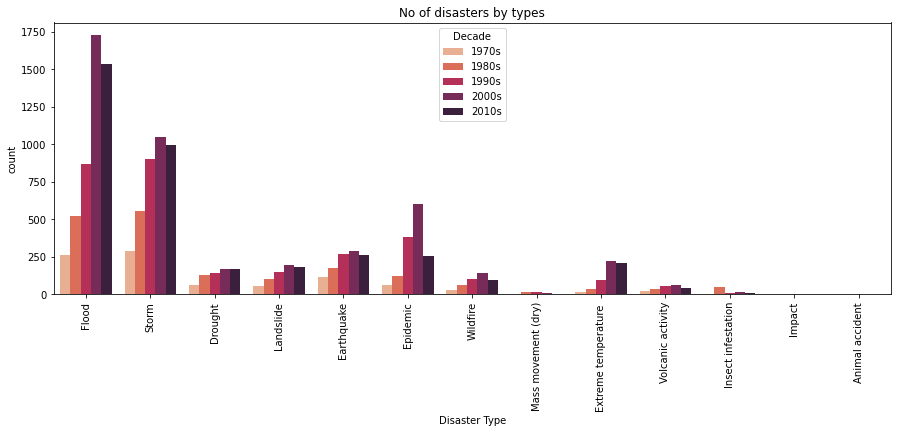

In [41]:
fig, ax = plt.subplots(1, figsize=(15, 5))
plt.xticks(rotation=90)
sns.countplot(x='Disaster Type', hue='Decade', data=df, palette='rocket_r', ax=ax)
ax.set_title("No of disasters by types");

In [42]:
# Annual average

pd.pivot_table(data = df, 
               index = 'Disaster Type', 
               columns = 'Decade', 
               values = 'Dis No', 
               aggfunc = 'count',
               margins = True,
               margins_name = 'World (Total)').drop('World (Total)', axis = 1) / 10

Decade,1970s,1980s,1990s,2000s,2010s
Disaster Type,,,,,
Animal accident,NaN,NaN,NaN,NaN,0.1
Drought,6.1,12.6,14.0,17.0,16.9
Earthquake,11.2,17.2,26.6,28.9,26.3
Epidemic,5.9,12.4,38.5,60.0,25.7
Extreme temperature,1.5,3.8,9.2,22.4,20.8
Flood,26.4,52.4,86.5,172.5,153.3
Impact,NaN,NaN,NaN,NaN,0.1
Insect infestation,0.5,4.8,1.1,1.8,0.9
Landslide,5.4,10.4,15.0,19.2,18.4


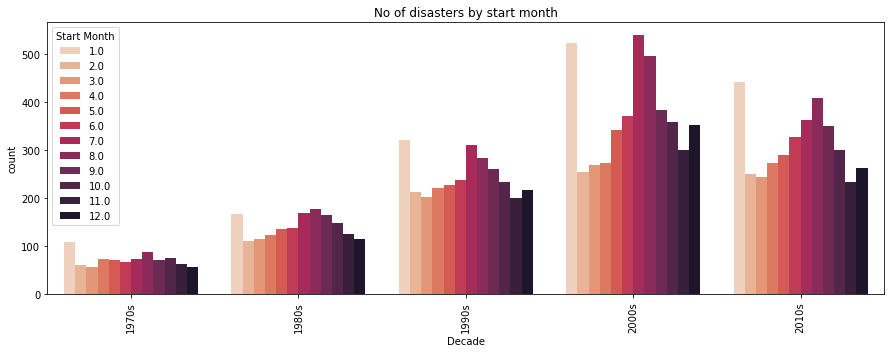

In [43]:
fig, ax = plt.subplots(1, figsize=(15, 5))
plt.xticks(rotation=90)
sns.countplot(x='Decade', hue='Start Month', data=df, palette='rocket_r', ax=ax)
ax.set_title("No of disasters by start month");

In [44]:
# Disasters that happens more often in summer are related with climate: drought, extreme temperature, flood, storm, wildfire
# January - increase in epidemic disasters

pd.pivot_table(data = df, 
               index = 'Disaster Type', 
               columns = 'Start Month', 
               values = 'Dis No', 
               aggfunc = 'count',
               margins = True,
               margins_name = 'World (Total)').drop('World (Total)', axis = 1)

Start Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Disaster Type,,,,,,,,,,,,
Animal accident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Drought,107.0,30.0,45.0,50.0,45.0,54.0,51.0,37.0,29.0,36.0,23.0,33.0
Earthquake,86.0,86.0,93.0,97.0,104.0,76.0,92.0,88.0,95.0,93.0,98.0,94.0
Epidemic,351.0,91.0,96.0,77.0,87.0,89.0,89.0,99.0,89.0,117.0,88.0,104.0
Extreme temperature,139.0,38.0,6.0,15.0,29.0,49.0,115.0,25.0,3.0,11.0,35.0,108.0
Flood,360.0,272.0,318.0,341.0,413.0,518.0,577.0,634.0,405.0,403.0,325.0,313.0
Impact,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insect infestation,7.0,7.0,5.0,4.0,4.0,9.0,13.0,6.0,4.0,5.0,4.0,1.0
Landslide,69.0,59.0,57.0,60.0,53.0,59.0,78.0,58.0,53.0,41.0,39.0,45.0


# II. Number of deaths and affected people

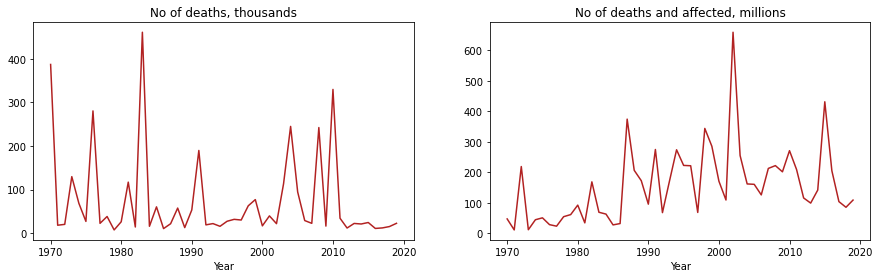

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

(df.groupby('Year')['Total Deaths'].sum()/1_000).sort_index().plot(color='firebrick', ax=axs[0])
(df.groupby('Year')['Deaths and Affected'].sum()/1_000_000).sort_index().plot(color='firebrick', ax=axs[1])

axs[0].set_title("No of deaths, thousands")
axs[1].set_title("No of deaths and affected, millions");

In [46]:
df_map2 = df.groupby('ISO')[['Total Deaths']].sum().reset_index()

world_map2 = folium.Map(location=[0,0], zoom_start=2)

folium.Choropleth(geo_data=data,
                data=df_map2,
                columns=['ISO', 'Total Deaths'],
                key_on='feature.id',
                fill_color='OrRd',
                legend_name='Total Deaths 1970-2019'
                ).add_to(world_map2)

world_map2

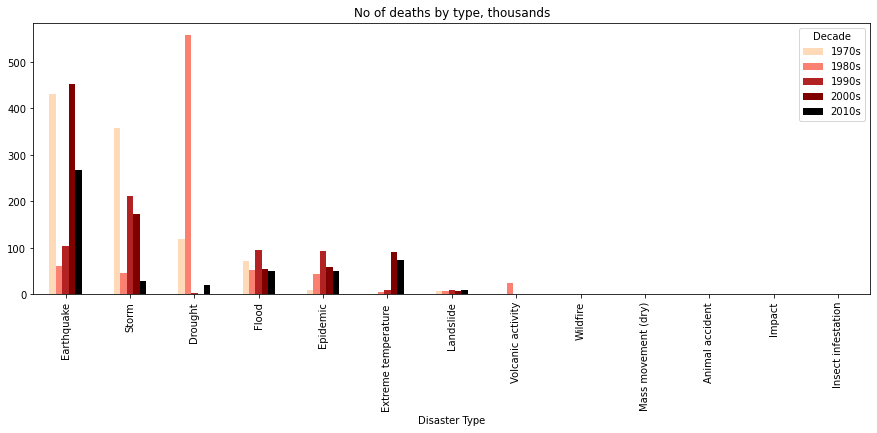

In [47]:
df_plot = pd.pivot_table(data = df, 
               index ='Disaster Type', 
               columns = 'Decade', 
               values = 'Total Deaths', 
               aggfunc = 'sum',
               margins = True,
               margins_name = 'World (Total)').sort_values('World (Total)', ascending=False).drop('World (Total)').drop('World (Total)', axis=1) / 1_000

fig, ax = plt.subplots(1, figsize=(15, 5))
df_plot.plot(kind='bar', color=['peachpuff', 'salmon', 'firebrick','maroon', 'black'], ax=ax)
ax.set_title("No of deaths by type, thousands");

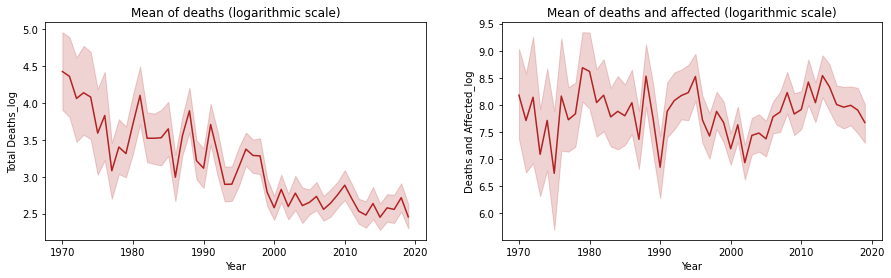

In [48]:
# Logarithmic scale

df['Total Deaths_log'] = np.log(df['Total Deaths'])
df['Deaths and Affected_log'] = np.log(df['Deaths and Affected'])

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.lineplot(data=df, x='Year', y='Total Deaths_log', color='firebrick', ax=axs[0])
sns.lineplot(data=df, x='Year', y='Deaths and Affected_log', color='firebrick', ax=axs[1])

axs[0].set_title("Mean of deaths (logarithmic scale)")
axs[1].set_title("Mean of deaths and affected (logarithmic scale)");

In [49]:
# Average number of deaths per natural disaster

df.groupby('Decade')['Total Deaths'].mean().round(2)

Decade
1970s    1620.98
1980s     696.94
1990s     255.71
2000s     264.32
2010s     184.62
Name: Total Deaths, dtype: float64

In [50]:
# Average number of affected people per natural disaster

df.groupby('Decade')['Deaths and Affected'].mean().round(2)

Decade
1970s    713669.84
1980s    849285.18
1990s    769924.22
2000s    545566.29
2010s    497540.83
Name: Deaths and Affected, dtype: float64

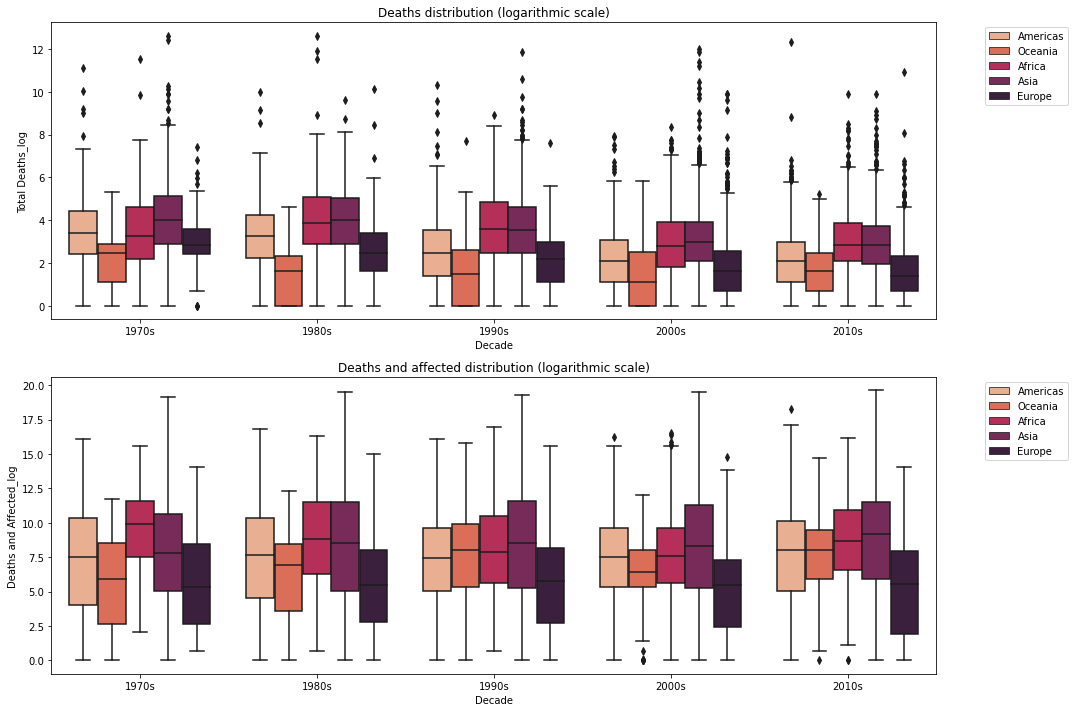

In [51]:
# Logarithmic scale

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

sns.boxplot(x='Decade', y='Total Deaths_log', hue='Continent', data=df, palette='rocket_r', ax=axs[0])
sns.boxplot(x='Decade', y='Deaths and Affected_log', hue='Continent', data=df, palette='rocket_r', ax=axs[1])

axs[0].set_title("Deaths distribution (logarithmic scale)")
axs[1].set_title("Deaths and affected distribution (logarithmic scale)")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout();

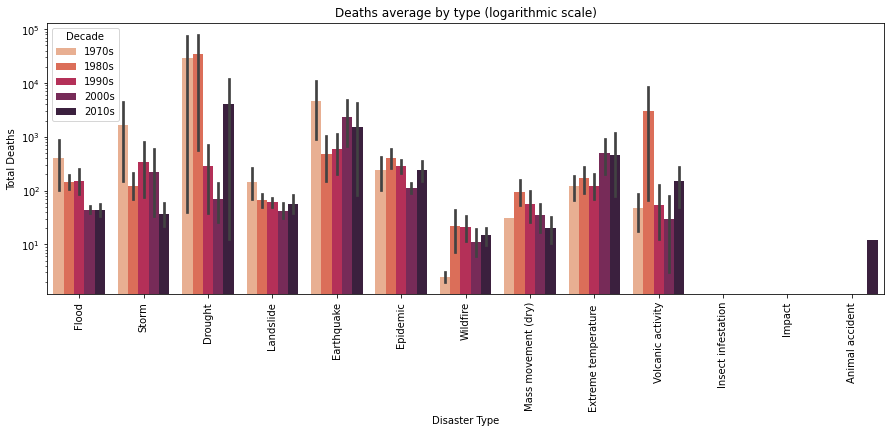

In [52]:
# Logarithmic scale

# Highest deaths average - earthquakes, not decreasing
# Extreme temperature deaths average - increasing

fig, ax = plt.subplots(1, figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='Disaster Type', y='Total Deaths', hue='Decade', data=df, log=True, palette='rocket_r', ax=ax)
ax.set_title("Deaths average by type (logarithmic scale)");

### Earthquakes

In [53]:
df_earthquakes = df.loc[(df['Disaster Type'] == 'Earthquake') & (df['Disaster Subtype'] == 'Ground movement') & (df['Dis Mag Value'].notnull())].copy()
df_earthquakes['Total Deaths_log'] = np.log(df_earthquakes['Total Deaths'])

df_earthquakes[['Dis Mag Value', 'Total Deaths_log']].corr()

,Dis Mag Value,Total Deaths_log
Dis Mag Value,1.000000,0.338403
Total Deaths_log,0.338403,1.000000


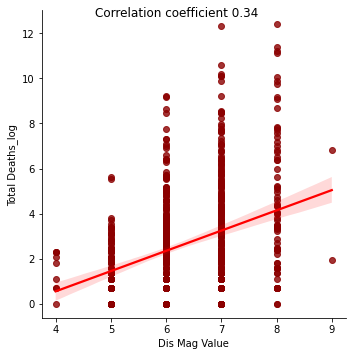

In [54]:
sns.lmplot(x = 'Dis Mag Value', y = 'Total Deaths_log', data=df_earthquakes, scatter_kws={"color":"darkred"},line_kws={"color":"r",}).fig.suptitle("Correlation coefficient 0.34");

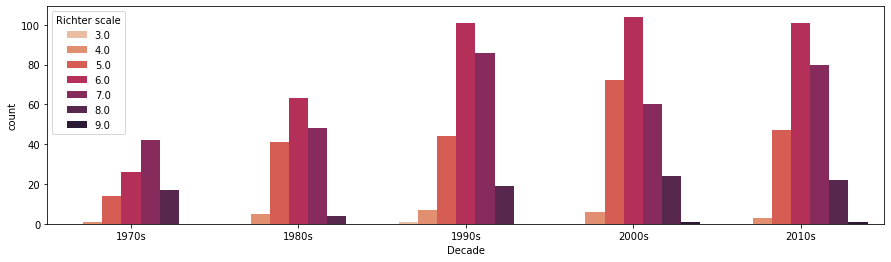

In [55]:
df_earthquakes = df.loc[(df['Disaster Type'] == 'Earthquake') & (df['Disaster Subtype'] == 'Ground movement') & (df['Dis Mag Value'].notnull())].copy()

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
sns.countplot(x = 'Decade', hue = 'Dis Mag Value', data = df_earthquakes, palette='rocket_r');
ax.legend(title="Richter scale");

In [56]:
pd.pivot_table(data = df_earthquakes, 
               index = 'Dis Mag Value', 
               columns = 'Decade', 
               values = 'Dis No', 
               aggfunc = 'count',
               margins = True,
               margins_name = 'World (Total)').drop('World (Total)', axis = 1)

Decade,1970s,1980s,1990s,2000s,2010s
Dis Mag Value,,,,,
3.0,NaN,NaN,1.0,NaN,NaN
4.0,1.0,5.0,7.0,6.0,3.0
5.0,14.0,41.0,44.0,72.0,47.0
6.0,26.0,63.0,101.0,104.0,101.0
7.0,42.0,48.0,86.0,60.0,80.0
8.0,17.0,4.0,19.0,24.0,22.0
9.0,NaN,NaN,NaN,1.0,1.0
World (Total),100.0,161.0,258.0,267.0,254.0


# III. Damages caused by natural disasters

In [57]:
# NaN values in Damages column are random

In [58]:
df_damages = df.loc[df['Damages adjusted'].notnull()].copy()

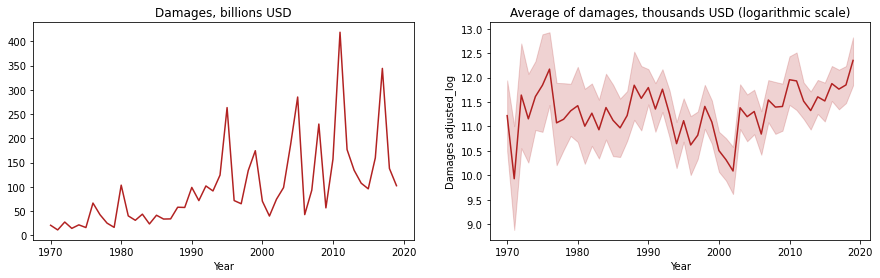

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

df_damages['Damages adjusted_log'] = np.log(df_damages['Damages adjusted'])
(df_damages.groupby('Year')['Damages adjusted'].sum() * 1_000 / 1_000_000_000).sort_index().plot(color='firebrick', ax=axs[0])
sns.lineplot(data=df_damages, x='Year', y='Damages adjusted_log', color='firebrick', ax=axs[1]);

axs[0].set_title("Damages, billions USD")
axs[1].set_title("Average of damages, thousands USD (logarithmic scale)");

In [60]:
print("Average damages per disaster, billions USD:")
(df.groupby('Decade')['Damages adjusted'].mean() * 1_000 / 1_000_000_000).round(2)

Average damages per disaster, billions USD:


Decade
1970s    0.81
1980s    0.83
1990s    1.02
2000s    0.93
2010s    1.38
Name: Damages adjusted, dtype: float64

In [61]:
df_damages[['Damages adjusted', 'Deaths and Affected']].corr()

,Damages adjusted,Deaths and Affected
Damages adjusted,1.000000,0.128987
Deaths and Affected,0.128987,1.000000


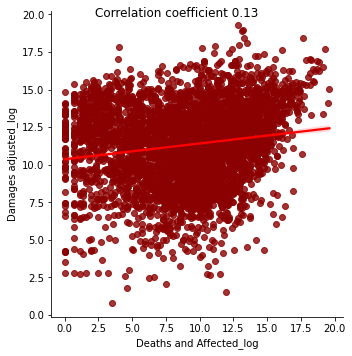

In [62]:
# Logarithmic scale

df_damages['Damages adjusted_log'] = np.log(df_damages['Damages adjusted'])
df_damages['Deaths and Affected_log'] = np.log(df_damages['Deaths and Affected'])
sns.lmplot(x = 'Deaths and Affected_log', y = 'Damages adjusted_log', data=df_damages, scatter_kws={"color":"darkred"},line_kws={"color":"r",}).fig.suptitle("Correlation coefficient 0.13");

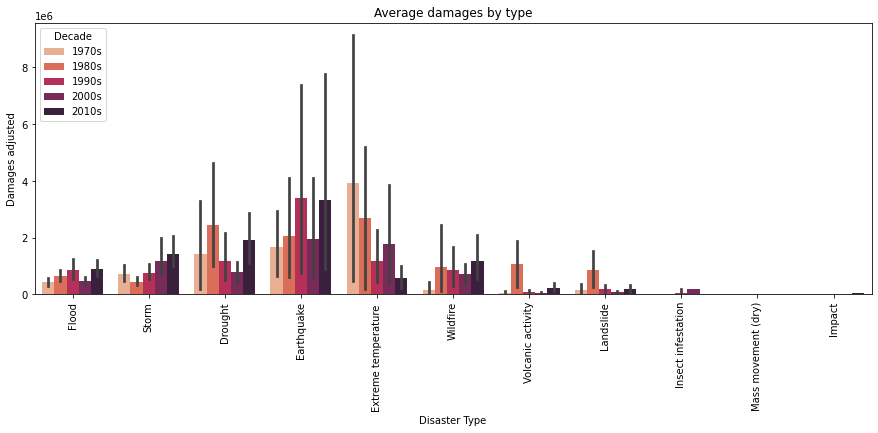

In [63]:
fig, ax = plt.subplots(1, figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='Disaster Type', y='Damages adjusted', hue='Decade', data=df_damages, palette='rocket_r', ax=ax)
ax.set_title("Average damages by type");

# Conclusions

There have been changes regarding natural disasters frequency, mortality and caused damages over the past 50 years.

- Total number of natural disasters is increasing worldwide and in each continent, also by each type.
- Floods and storms frequence is highest in all continents, except Africa (floods and epidemics).
- Now more disasters happen in summer period and it is related with the climate: drought, extreme temperature, flood, storm, wildfire.
- Total number of deaths is not increasing as mortality per natural disaster is decreasing in all continents.
- Average number of affected people per disaster is not decreasing during last 50 years.
- Earhquakes and storms have the highest mortality, also earhquakes mortality is not decreasing and extreme temperature mortality is increasing during last 50 years.
- Earthquakes value in Richter scale has 0.34 correlation coefficient with the number of deaths. The share of strong earthquakes hasn't increased - mortality probably is related with the nature of earthquakes (its unpredictability, massiveness and tsunamis that usually follows).
- The sum of total damages is increasing, but damages per disaster - not.
- Damages has weak correlation with number of dead and affected people, but it depends on disaster type. Average damage caused by an earthquake is the highest.
- There is not enough data in this dataset for deeper analysis (e.g. fully understanding reasons of changes). 

P.S. Save the planet!